<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/House_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [12]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("BostonHousing.csv")

Saving BostonHousing.csv to BostonHousing (2).csv


In [15]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
df.shape

(506, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [20]:
df['rm'].fillna(df['rm'].mode()[0], inplace=True)

/tmp/ipython-input-239025052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mode()[0], inplace=True)


In [22]:
df.rename(columns={'medv': 'price'}, inplace=True)

In [24]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.278696,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704360,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.877250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.194000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
correlation = df.corr()

<Axes: >

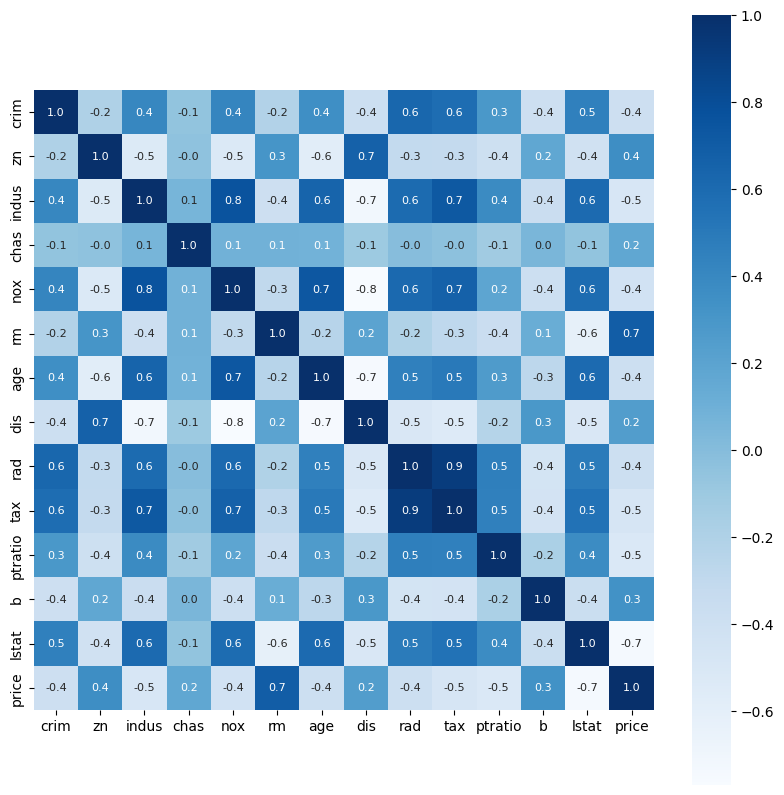

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws = {"size":8}, cmap= "Blues")

In [30]:
x = df.drop(['price'], axis=1)
y = df['price']

In [31]:
print(x)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [34]:
model = XGBRegressor()

In [35]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
training_data_prediction = model.predict(x_train)

In [40]:
print(training_data_prediction)

[23.103039  20.995087  20.10083   34.699722  13.912352  13.498124
 21.998224  15.201382  10.899207  22.693327  13.818425   5.609421
 29.79739   49.997078  34.89715   20.603796  23.384556  19.195486
 32.703808  19.60195   26.998014   8.397854  45.998005  21.713667
 27.097948  19.385899  19.295359  24.801622  22.59753   31.71
 18.52713    8.696456  17.402702  23.70038   13.295049  10.502512
 12.690801  24.996428  19.698006  14.906789  24.205908  24.989923
 14.900314  16.990036  15.591408  12.719584  24.50099   14.999335
 49.999596  17.512022  21.194405  32.003677  15.604478  22.894459
 19.311108  18.705046  23.303314  37.20031   30.098675  33.102608
 21.004915  49.997066  13.39281    5.005904  16.506342   8.401047
 28.691216  19.50286   20.594893  45.400787  39.80152   33.396896
 19.805977  33.40297   25.288832  49.995968  12.52197   17.41836
 18.60429   22.599092  50.006874  23.76265   23.312792  23.087217
 41.71548   16.10605   31.612604  36.100113   7.0017214 20.389046
 19.99892   11.

In [41]:
#R square error
score_1 = metrics.r2_score(y_train, training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R square error : ", score_1)
print("Mean Absolute Error : ", score_2)

R square error :  0.9999988767842641
Mean Absolute Error :  0.006870591286385414


**Visualizing the actual prediction**

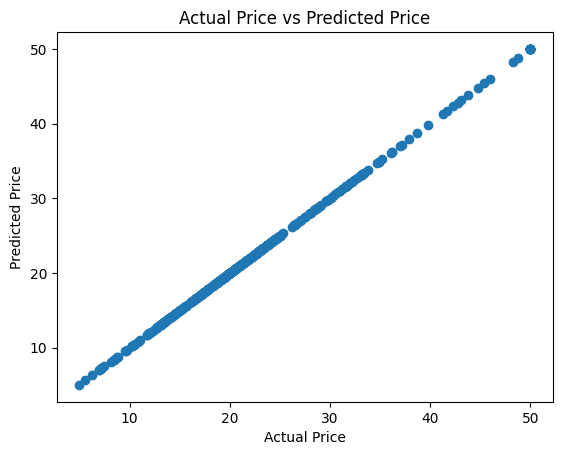

In [45]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [42]:
test_data_prediction = model.predict(x_test)

In [43]:
print(test_data_prediction)

[21.473202  22.056093  31.592836  29.78973    8.572132  12.683036
 24.720026  27.695803  23.705164  20.457481  26.63056   23.33887
 19.387995  19.362783  13.14683   22.634966  20.525208  11.265731
  7.876656  15.046257  22.040197  20.10168   35.59274   18.137096
 14.899794  18.709806  46.120552  33.03498   33.21689   18.685644
 16.901976  19.849676  29.788643  25.672     11.573576  18.503263
 11.747683  21.465     21.462868  21.953075  25.122976  12.240594
 28.116003   8.791508  20.678331  13.753848  34.632946  14.095544
 32.60514   15.332343  30.96016   27.756927   6.7442923 34.847076
 25.83719   19.58873   19.623262  20.101131  15.707623  22.661148
 21.913363  22.076736  19.234951  30.156689  34.294537  25.607319
 48.87049   24.927336  11.150049  23.086958  17.194073   8.45508
 14.922064  18.173534  27.221361  25.132801  20.549856  21.874626
 21.438438  23.342405  34.23321   20.574472  20.630651  30.64048
 47.94614   35.676342  18.057653  23.662313  28.127783  19.13912
 20.689592  20

In [44]:
#R square error
score_1 = metrics.r2_score(y_test, test_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R square error : ", score_1)
print("Mean Absolute Error : ", score_2)

R square error :  0.9187395196244593
Mean Absolute Error :  1.9840599873486684
